<img src = '../../images/ATUlogo.png'>

# Title - Models Exercise 2: Fit a straight line to the following data points, using all three methods used above.

<b> Do you think a straight line is a good model for these points?

x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0] 

y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

## 1. Overview

In [1]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

## 2. Calculations

Methods to fit straight line to datapoints:
- Cost Function
- Spicy
- Curve Fitting

In [3]:
#x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
x = np.arange(2.0, 21.0, 1.0)
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

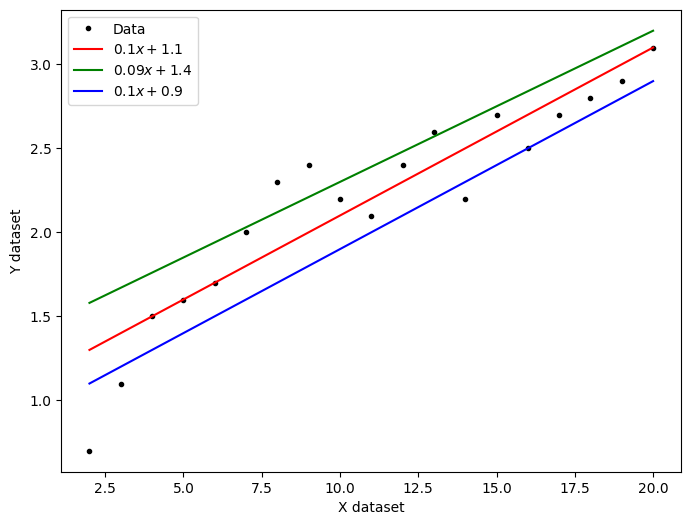

In [29]:
#Code extracted from lecture content - refernece 1 
# Plot x versus y with black dots.
plt.plot(x, y, 'k.', label="Data")

# Overlay some lines on the plot.

plt.plot(x, 0.1 * x + 1.1, 'r-', label=r"$0.1x + 1.1$")
plt.plot(x, 0.09 * x + 1.4, 'g-', label=r"$0.09x +  1.4$")
plt.plot(x, 0.1 * x + 0.9, 'b-', label=r"$0.1x + 0.9$")

# Add a legend and labels
plt.legend()
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

# Show the plot.
plt.show()

<b> 2.1. Applying Cost Function to straight lines
    
 Note the code below was extracted from notebook 2 of machine learning and adapted for use. Please see reference [1]. 

In [23]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.1, 1.1, cost(0.1, 1.1)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.09,  1.4, cost(0.09,  1.4,)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.1, 0.9, cost(0.1, 0.9)))

Cost with m =  0.10 and c =  1.10:     1.05
Cost with m =  0.09 and c =  1.40:     1.94
Cost with m =  0.10 and c =  0.90:     1.69


In [24]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(x)
d_avg = np.mean(y)

# Subtract means from w and d.
w_zero = x - w_avg
d_zero = y - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.103158 and c is 1.049474.


In [25]:
np.polyfit(x, y, 1)

array([0.10315789, 1.04947368])

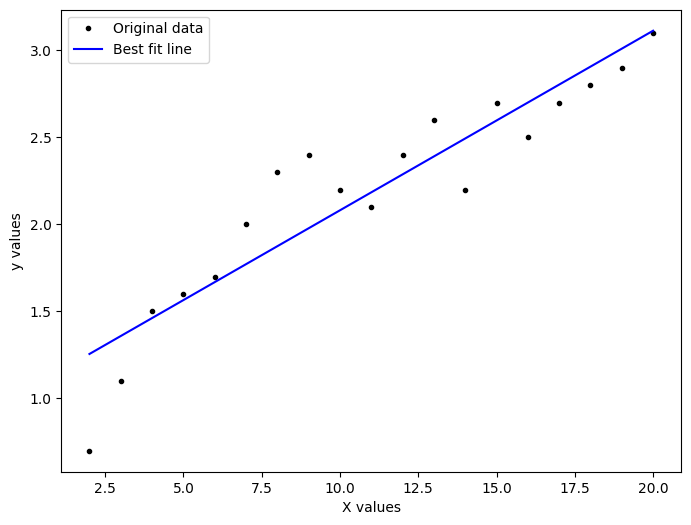

In [26]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()

# Show the plot.
plt.show()

In [27]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  0.10 and c =  1.05:     1.04


<b> Optimization using Spicy 

In [32]:
# Optimization.
import scipy.optimize as so

In [34]:
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (0.1, 0.9))
# Show the results.
result

      fun: 1.039578947368597
 hess_inv: array([[ 0.00546825, -0.07257377],
       [-0.07257377,  0.99489558]])
      jac: array([ 2.56299973e-06, -1.93715096e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([0.10315788, 1.04947378])

In [35]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315788066835556, 1.049473781155424)

In [36]:
# Previous, analytical result.
m_a, c_a = np.polyfit(x, y, 1)
# Print analytical results.
m_a, c_a

(0.10315789473684209, 1.0494736842105261)

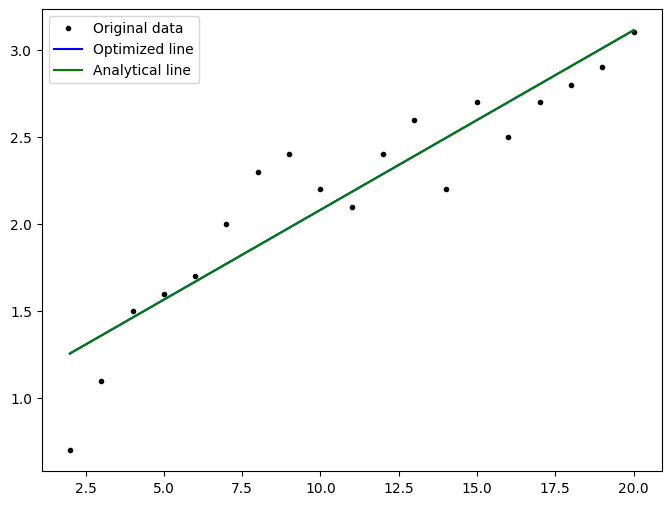

In [37]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

<b> 2.3. Curve Fitting 

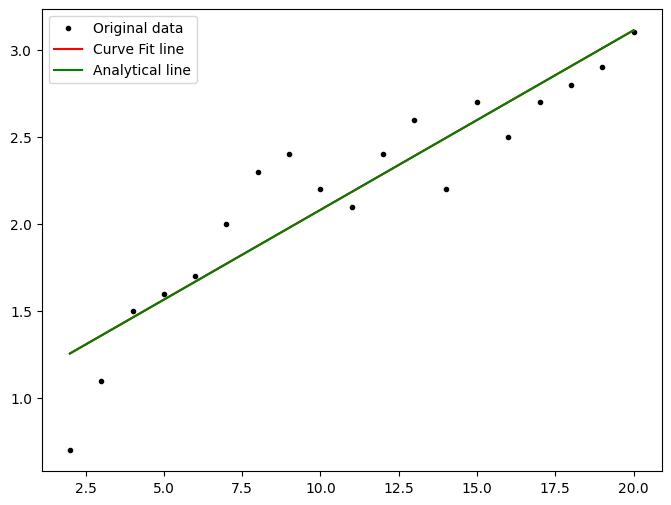

In [38]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Create the model function.
def f(x, m, c):
    return m * x + c
# Run curve_fit.
result = so.curve_fit(f, x, y)
# Look at the result.
result
# Pull out the parameters.
m_f, c_f = result[0]
# Print values.
m_f, c_f
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()


## 3. References
1. https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb